<a href="https://colab.research.google.com/github/NabilahSharfina/CELERATES-ACCELERATION-PROGRAM/blob/main/Final_Project_Credit_Risk_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>FINAL PROJECT</bold></center><h1>
<h1><center><bold>BIG DATA AND BUSINESS INTELLIGENCE</bold></center><h1>
<h1><center><bold>KAMPUS MERDEKA</bold></center><h1>
<h2><center><bold>CREDIT RISK ANALYSIS</bold></center><h2>

---



## Connect Google Drive

In [ ]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

# **A. WEEK 1 - DATA PREPARATION**

## 1. Import Library

In [2]:
import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

## 2. EDA Dataset

### a. Dataset Female & Male

#### 1) Import Data

In [3]:
female = pd.read_excel("/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/application_history_f.xlsx")
female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294360 entries, 0 to 294359
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          294360 non-null  int64  
 1   JK                   294360 non-null  object 
 2   KepemilikanMobil     294360 non-null  object 
 3   KepemilikanProperti  294360 non-null  object 
 4   JmlAnak              294360 non-null  int64  
 5   Pendapatan           294360 non-null  float64
 6   TipePendapatan       294360 non-null  object 
 7   TingkatPendidikan    294360 non-null  object 
 8   StatusKeluarga       294360 non-null  object 
 9   TipeRumah            294360 non-null  object 
 10  FlagMobile           294360 non-null  int64  
 11  FlagWorkPhone        294360 non-null  int64  
 12  FlagPhone            294360 non-null  int64  
 13  Email                294360 non-null  int64  
 14  Pekerjaan            190310 non-null  object 
 15  JmlAnggotaKeluarg

In [4]:
male = pd.read_excel("/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/application_history_m.xlsx")
male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144096 entries, 0 to 144095
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          144096 non-null  int64  
 1   JK                   144096 non-null  object 
 2   KepemilikanMobil     144096 non-null  object 
 3   KepemilikanProperti  144096 non-null  object 
 4   JmlAnak              144096 non-null  int64  
 5   Pendapatan           144096 non-null  float64
 6   TipePendapatan       144096 non-null  object 
 7   TingkatPendidikan    144096 non-null  object 
 8   StatusKeluarga       144096 non-null  object 
 9   TipeRumah            144096 non-null  object 
 10  FlagMobile           144096 non-null  int64  
 11  FlagWorkPhone        144096 non-null  int64  
 12  FlagPhone            144096 non-null  int64  
 13  Email                144096 non-null  int64  
 14  Pekerjaan            113903 non-null  object 
 15  JmlAnggotaKeluarg

#### 2) Application Merge Data  

In [7]:
app_df = pd.merge(female, male, how='outer')
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294360 entries, 0 to 294359
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          294360 non-null  int64  
 1   JK                   294360 non-null  object 
 2   KepemilikanMobil     294360 non-null  object 
 3   KepemilikanProperti  294360 non-null  object 
 4   JmlAnak              294360 non-null  int64  
 5   Pendapatan           294360 non-null  float64
 6   TipePendapatan       294360 non-null  object 
 7   TingkatPendidikan    294360 non-null  object 
 8   StatusKeluarga       294360 non-null  object 
 9   TipeRumah            294360 non-null  object 
 10  FlagMobile           294360 non-null  int64  
 11  FlagWorkPhone        294360 non-null  int64  
 12  FlagPhone            294360 non-null  int64  
 13  Email                294360 non-null  int64  
 14  Pekerjaan            190310 non-null  object 
 15  JmlAnggotaKeluarg

#### 3) Rename Data

In [11]:
# Rename 'JK', 'Age', dan 'Experience' Columns
app_df.rename(
    columns = {'JK':'JenisKelamin', 
               'Age':'Usia',
               'Experience':'Pengalaman'
               }, inplace=True
              )

In [ ]:
set(app_df['TingkatPendidikan'])

{'G', 'PG', 'UG'}

In [ ]:
set(app_df['StatusKeluarga'])

{'D', 'M', 'NM'}

In [ ]:
set(app_df['TipeRumah'])

{'MA', 'MH', 'OA', 'PH', 'RA'}

In [ ]:
# Replaced value of 'TingkatPendidikan'
app_df = app_df.replace({'TingkatPendidikan':
                                    {
                                      'G': 'Graduate', 
                                      'PG': 'Post Graduate', 
                                      'UG': 'Under Graduate'
                                    }
                                  }
                                  )

# Replaced value of 'StatusKeluarga'
app_df = app_df.replace({'StatusKeluarga':
                                    {
                                      'D': 'Cerai', 
                                      'M': 'Menikah', 
                                      'NM': 'Belum Menikah'
                                    }
                                  }
                                  )

# Replaced value of 'TipeRumah' 
app_df = app_df.replace({'TipeRumah':
                                    {
                                      'MA': 'Apartment Pribadi', 
                                      'MH': 'Rumah Pribadi', 
                                      'OA': 'Apartment Kantor',
                                      'PH': 'Rumah Orang Tua', 
                                      'RA': 'Sewa Apartment'
                                    }
                                  }
                                )
app_df.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,0
1,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,-1
2,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,0
3,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,-1
4,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,-1


#### 4) Missing Value

In [12]:
app_df.isnull().sum()

Id_customer                 0
JenisKelamin                0
KepemilikanMobil            0
KepemilikanProperti         0
JmlAnak                     0
Pendapatan                  0
TipePendapatan              0
TingkatPendidikan           0
StatusKeluarga              0
TipeRumah                   0
FlagMobile                  0
FlagWorkPhone               0
FlagPhone                   0
Email                       0
Pekerjaan              104050
JmlAnggotaKeluarga          0
Usia                        0
Pengalaman                  0
dtype: int64

In [20]:
# Drop 'Pekerjaan' column
application = app_df.drop('Pekerjaan', axis = 1)
application

,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,1,52,8
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,1,52,8
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,1,52,8
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,1,52,8
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,PG,D,MH,1,0,0,0,1,62,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294355,5009315,Perempuan,Ya,Tidak,0,135000.0,Pensioner,G,M,MH,1,0,1,1,2,55,1001
294356,5009316,Perempuan,Ya,Tidak,0,135000.0,Pensioner,G,M,MH,1,0,1,1,2,55,1001
294357,5009317,Perempuan,Ya,Tidak,0,135000.0,Pensioner,G,M,MH,1,0,1,1,2,55,1001
294358,5009318,Perempuan,Ya,Tidak,0,135000.0,Pensioner,G,M,MH,1,0,1,1,2,55,1001


#### 5) Unique Value

In [32]:
# Unique value in each columns
pd.Series({col:application[col].nunique() for col in application})

Id_customer            294271
JenisKelamin                1
KepemilikanMobil            2
KepemilikanProperti         2
JmlAnak                    10
Pendapatan                681
TipePendapatan              5
TingkatPendidikan           3
StatusKeluarga              3
TipeRumah                   5
FlagMobile                  1
FlagWorkPhone               2
FlagPhone                   2
Email                       2
JmlAnggotaKeluarga         11
Usia                       49
Pengalaman                 49
dtype: int64

#### 6) Check Duplicate Data

In [26]:
# Check duplicates value
application.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
294355     True
294356     True
294357     True
294358     True
294359     True
Length: 294360, dtype: bool

In [33]:
# Drop duplicates on Id_customer
application_df = application.drop_duplicates(subset='Id_customer', keep='last')
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294271 entries, 0 to 294359
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          294271 non-null  int64  
 1   JenisKelamin         294271 non-null  object 
 2   KepemilikanMobil     294271 non-null  object 
 3   KepemilikanProperti  294271 non-null  object 
 4   JmlAnak              294271 non-null  int64  
 5   Pendapatan           294271 non-null  float64
 6   TipePendapatan       294271 non-null  object 
 7   TingkatPendidikan    294271 non-null  object 
 8   StatusKeluarga       294271 non-null  object 
 9   TipeRumah            294271 non-null  object 
 10  FlagMobile           294271 non-null  int64  
 11  FlagWorkPhone        294271 non-null  int64  
 12  FlagPhone            294271 non-null  int64  
 13  Email                294271 non-null  int64  
 14  JmlAnggotaKeluarga   294271 non-null  int64  
 15  Usia             

In [35]:
test_duplicate = application_df[application_df['Id_customer'] == 5009315]
test_duplicate

,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman
294355,5009315,Perempuan,Ya,Tidak,0,135000.0,Pensioner,G,M,MH,1,0,1,1,2,55,1001


In [56]:
# Clean from duplicates value
application_df.duplicated()

0         False
1         False
2         False
3         False
7         False
          ...  
294355    False
294356    False
294357    False
294358    False
294359    False
Length: 294271, dtype: bool

### b. Dataset Credit History

#### 1) Import Data

In [5]:
credit = pd.read_csv("/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/credit_history_text.csv")
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043986 entries, 0 to 1043985
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Id_customer  1043986 non-null  int64 
 1   Overdue      1043986 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.9+ MB


In [37]:
credit

,Id_customer,Overdue
0,5001711,Tidak memiliki pinjaman
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0
...,...,...
1043981,5150487,0
1043982,5150487,0
1043983,5150487,0
1043984,5150487,0


#### 2) Replace Value Overdue

In [38]:
# Overwriting rows with replaced value of overdue which 'Tidak memiliki pinjaman' = -1
credit['Overdue'] = credit['Overdue'].replace('Tidak memiliki pinjaman', -1)
credit['Overdue'] = credit['Overdue'].astype(int)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043986 entries, 0 to 1043985
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   Id_customer  1043986 non-null  int64
 1   Overdue      1043986 non-null  int64
dtypes: int64(2)
memory usage: 15.9 MB


In [39]:
overdue_dummy = pd.get_dummies(credit['Overdue'])
overdue_dummy.head()

,-1,0,1,2,3,4,5
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


#### 3) Duplicate Value

In [36]:
# Check duplicates value
credit.duplicated()

0          False
1          False
2           True
3           True
4          False
           ...  
1043981     True
1043982     True
1043983     True
1043984     True
1043985     True
Length: 1043986, dtype: bool

In [43]:
credit

,Id_customer,Overdue
0,5001711,-1
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0
...,...,...
1043981,5150487,0
1043982,5150487,0
1043983,5150487,0
1043984,5150487,0


#### 4) Find Overdue Max Value

In [49]:
# Mengambil nilai max 'Overdue' dari 'Id_customer'
overdue_max = credit.groupby(['Id_customer'], sort=False)['Overdue'].max()
overdue_max = pd.DataFrame(data = overdue_max).reset_index()
overdue_max

,Id_customer,Overdue
0,5001711,0
1,5001712,0
2,5001713,-1
3,5001714,-1
4,5001715,-1
...,...,...
45780,5150482,0
45781,5150483,-1
45782,5150484,0
45783,5150485,0


In [50]:
test_max = overdue_max[overdue_max['Id_customer'] == 5001714]['Overdue'].max()
test_max

-1

In [52]:
credit_history = overdue_max.drop_duplicates(subset='Id_customer', keep='last')
credit_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45785 entries, 0 to 45784
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Id_customer  45785 non-null  int64
 1   Overdue      45785 non-null  int64
dtypes: int64(2)
memory usage: 1.0 MB


In [53]:
credit_history

,Id_customer,Overdue
0,5001711,0
1,5001712,0
2,5001713,-1
3,5001714,-1
4,5001715,-1
...,...,...
45780,5150482,0
45781,5150483,-1
45782,5150484,0
45783,5150485,0


#### 5) Unique Value 

In [54]:
credit_history.groupby('Overdue')['Id_customer'].nunique()

Overdue
-1     4536
 0    35976
 1     4617
 2      328
 3       87
 4       48
 5      193
Name: Id_customer, dtype: int64

#### 6) Check Duplicate Value 

In [55]:
# Clean from duplicates value
credit_history.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45780    False
45781    False
45782    False
45783    False
45784    False
Length: 45785, dtype: bool

## 3. Join All Dataset

### a. Merge Application & Credit History

In [57]:
credit_risk = pd.merge(application_df, credit_history, on='Id_customer', how='inner')
credit_risk

,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman,Overdue
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,1,52,8,0
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,1,52,8,-1
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,1,52,8,0
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,1,52,8,0
4,5008825,Perempuan,Ya,Tidak,0,130500.0,Bekerja,G,M,MH,1,0,0,0,2,29,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24274,5009315,Perempuan,Ya,Tidak,0,135000.0,Pensioner,G,M,MH,1,0,1,1,2,55,1001,0
24275,5009316,Perempuan,Ya,Tidak,0,135000.0,Pensioner,G,M,MH,1,0,1,1,2,55,1001,0
24276,5009317,Perempuan,Ya,Tidak,0,135000.0,Pensioner,G,M,MH,1,0,1,1,2,55,1001,0
24277,5009318,Perempuan,Ya,Tidak,0,135000.0,Pensioner,G,M,MH,1,0,1,1,2,55,1001,0


In [58]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24279 entries, 0 to 24278
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          24279 non-null  int64  
 1   JenisKelamin         24279 non-null  object 
 2   KepemilikanMobil     24279 non-null  object 
 3   KepemilikanProperti  24279 non-null  object 
 4   JmlAnak              24279 non-null  int64  
 5   Pendapatan           24279 non-null  float64
 6   TipePendapatan       24279 non-null  object 
 7   TingkatPendidikan    24279 non-null  object 
 8   StatusKeluarga       24279 non-null  object 
 9   TipeRumah            24279 non-null  object 
 10  FlagMobile           24279 non-null  int64  
 11  FlagWorkPhone        24279 non-null  int64  
 12  FlagPhone            24279 non-null  int64  
 13  Email                24279 non-null  int64  
 14  JmlAnggotaKeluarga   24279 non-null  int64  
 15  Usia                 24279 non-null 

### b. Overdue Max Value by Id Customer

In [ ]:
# Mengambil nilai max 'Overdue' dari 'Id_customer'
#credit_risk.groupby(['Id_customer'], sort=False)['Overdue'].max()
#credit_risk

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue,overdue_max
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,0,NaN
1,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,-1,NaN
2,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,0,NaN
3,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,-1,NaN
4,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775040,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,Graduate,Belum Menikah,Sewa Apartment,1,0,0,0,Laborers,1,25,3,0,NaN
775041,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,Graduate,Belum Menikah,Sewa Apartment,1,0,0,0,Laborers,1,25,3,2,NaN
775042,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,Graduate,Belum Menikah,Sewa Apartment,1,0,0,0,Laborers,1,25,3,1,NaN
775043,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,Graduate,Belum Menikah,Sewa Apartment,1,0,0,0,Laborers,1,25,3,0,NaN


In [ ]:
# Apply idxmax() and use .loc() on dataframe to filter the rows with max values:
credit_risk.loc[credit_risk.groupby(['Id_customer'])['Overdue'].idxmax()] 
credit_risk

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,0
1,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,-1
2,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,0
3,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,-1
4,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775040,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,Graduate,Belum Menikah,Sewa Apartment,1,0,0,0,Laborers,1,25,3,0
775041,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,Graduate,Belum Menikah,Sewa Apartment,1,0,0,0,Laborers,1,25,3,2
775042,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,Graduate,Belum Menikah,Sewa Apartment,1,0,0,0,Laborers,1,25,3,1
775043,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,Graduate,Belum Menikah,Sewa Apartment,1,0,0,0,Laborers,1,25,3,0


In [ ]:
credit_risk.groupby(['Id_customer'])['Overdue'].max()

In [ ]:
cek_max2 = credit_risk[credit_risk['Id_customer'] == 5150337]['Overdue'].max()
cek_max2

2

### c. Overdue Category (Bad & Good)

In [ ]:
condition = [
    credit_risk.Overdue < 1,
    credit_risk.Overdue >= 1
]
labels = ['0', '1'] # good = 0, bad = 1
credit_risk['CreditStatus'] = np.select(condition, labels)
credit_risk.CreditStatus.value_counts()

credit_risk

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue,CreditStatus
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,0,1
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,-1,1
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,0,1
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,0,1
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,NaN,1,62,1001,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36345,5149158,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,1,0,0,Laborers,2,30,10,2,0
36346,5149190,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,0,1,1,Core staff,3,27,1,5,0
36347,5149729,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,NaN,2,52,5,2,0
36348,5149828,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Managers,2,48,7,5,0


### d. Correlation 

In [ ]:
credit_risk.describe()

,Id_customer,JmlAnak,Pendapatan,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,Overdue
count,3.635000e+04,36350.000000,3.635000e+04,36350.0,36350.000000,36350.000000,36350.000000,36350.000000,36350.000000,36350.000000,36350.000000
mean,5.078028e+06,0.429931,1.866216e+05,1.0,0.224979,0.294911,0.090426,2.197909,43.788831,175.543989,0.059917
std,4.196024e+04,0.742196,1.015080e+05,0.0,0.417574,0.456009,0.286796,0.911746,11.523184,372.771727,0.618866
min,5.008804e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,-1.000000
25%,5.041922e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,34.000000,3.000000,0.000000
50%,5.069496e+06,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,43.000000,7.000000,0.000000
75%,5.114625e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,53.000000,16.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,69.000000,1001.000000,5.000000


In [ ]:
credit_risk.describe(include=[object])

,JK,KepemilikanMobil,KepemilikanProperti,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,Pekerjaan,CreditStatus
count,36350,36350,36350,36350,36350,36350,36350,24993,36350
unique,2,2,2,5,3,3,5,18,2
top,Perempuan,Tidak,Ya,Bekerja,Graduate,Menikah,Rumah Pribadi,Laborers,1
freq,24346,22545,24406,18719,26112,27905,32439,6177,32128


In [ ]:
credit_risk.corr()

,Id_customer,JmlAnak,Pendapatan,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,Overdue
Id_customer,1.000000,0.029627,-0.018212,NaN,0.081082,0.009483,-0.049905,0.027532,-0.059117,-0.043589,0.002426
JmlAnak,0.029627,1.000000,0.034102,NaN,0.048292,-0.017384,0.016003,0.889089,-0.339096,-0.232304,-0.000443
Pendapatan,-0.018212,0.034102,1.000000,NaN,-0.037040,0.017081,0.085901,0.023939,-0.068228,-0.168172,0.003473
FlagMobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlagWorkPhone,0.081082,0.048292,-0.037040,NaN,1.000000,0.311381,-0.036183,0.064998,-0.179299,-0.243096,-0.003620
FlagPhone,0.009483,-0.017384,0.017081,NaN,0.311381,1.000000,0.012964,-0.004472,0.029370,-0.004510,-0.008609
Email,-0.049905,0.016003,0.085901,NaN,-0.036183,0.012964,1.000000,0.015411,-0.103365,-0.083169,0.014268
JmlAnggotaKeluarga,0.027532,0.889089,0.023939,NaN,0.064998,-0.004472,0.015411,1.000000,-0.303966,-0.223897,-0.005170
Age,-0.059117,-0.339096,-0.068228,NaN,-0.179299,0.029370,-0.103365,-0.303966,1.000000,0.625541,-0.001644
Experience,-0.043589,-0.232304,-0.168172,NaN,-0.243096,-0.004510,-0.083169,-0.223897,0.625541,1.000000,-0.001238


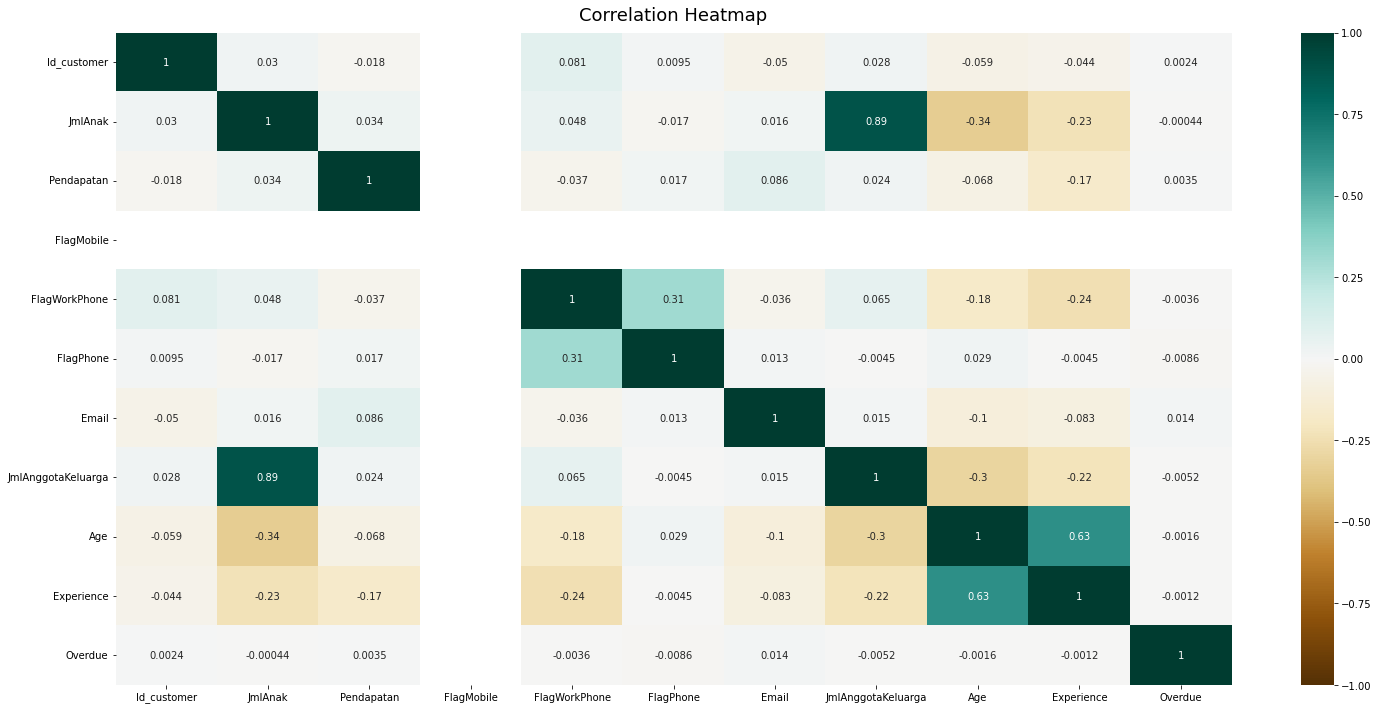

In [ ]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(credit_risk.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### e. Age Binning 

In [ ]:
# Mengubah 'Age' menjadi beberapa kategori:
# '10-24': remaja, '25-44': dewasa, '45-64': lansia, dan '>=65': manula 
credit_risk['Age_Bins'] = pd.cut(x=credit_risk['Age'], bins=[10, 25, 45, 65, 75], labels=['remaja', 'dewasa', 'lansia', 'manula'])
credit_risk['Age_Bins']

0        lansia
1        lansia
2        lansia
3        lansia
4        lansia
          ...  
36345    dewasa
36346    dewasa
36347    lansia
36348    lansia
36349    remaja
Name: Age_Bins, Length: 36350, dtype: category
Categories (4, object): ['remaja' < 'dewasa' < 'lansia' < 'manula']

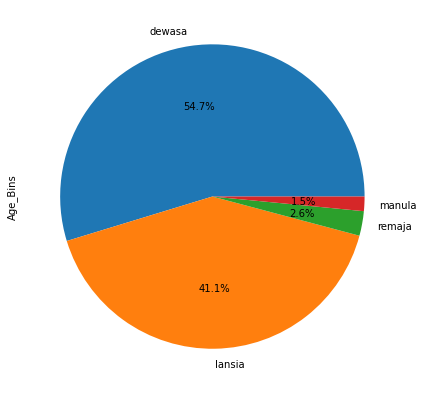

In [ ]:
credit_risk['Age_Bins'].value_counts().plot(figsize=(7,7),kind='pie', autopct = "%.1f%%")

# B. WEEK 2 - BUILD MODEL and PREDICT DATA TEST

### a. One Hot Encoding

In [ ]:
X = credit_risk.drop(columns=['FlagMobile', 'Pekerjaan', 'FlagPhone', 'Email', 'Experience'])
X.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,JmlAnggotaKeluarga,Age,Overdue,CreditStatus
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,52,0,1
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,52,-1,1
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,52,0,1
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,52,0,1
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,0,1,62,0,1


In [ ]:
X.nunique()

Id_customer            36257
JK                         2
KepemilikanMobil           2
KepemilikanProperti        2
JmlAnak                    9
Pendapatan               265
TipePendapatan             5
TingkatPendidikan          3
StatusKeluarga             3
TipeRumah                  5
FlagWorkPhone              2
JmlAnggotaKeluarga        10
Age                       49
Overdue                    7
CreditStatus               2
dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36350 entries, 0 to 36349
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          36350 non-null  int64  
 1   JK                   36350 non-null  object 
 2   KepemilikanMobil     36350 non-null  object 
 3   KepemilikanProperti  36350 non-null  object 
 4   JmlAnak              36350 non-null  int64  
 5   Pendapatan           36350 non-null  float64
 6   TipePendapatan       36350 non-null  object 
 7   TingkatPendidikan    36350 non-null  object 
 8   StatusKeluarga       36350 non-null  object 
 9   TipeRumah            36350 non-null  object 
 10  FlagWorkPhone        36350 non-null  int64  
 11  JmlAnggotaKeluarga   36350 non-null  int64  
 12  Age                  36350 non-null  int64  
 13  Overdue              36350 non-null  int64  
 14  CreditStatus         36350 non-null  object 
dtypes: float64(1), int64(6), object(8)
m

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
encoder.fit(X.select_dtypes(include="object"))
X_onehot = pd.DataFrame(encoder.transform(X.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

X_preprocessed = pd.concat([X.select_dtypes(exclude="object").reset_index(drop=True), X_onehot],axis=1)

scaler = StandardScaler()
scaler.fit(X_preprocessed)
X_scaled = pd.DataFrame(scaler.transform(X_preprocessed),columns=X_preprocessed.columns)

X_scaled

,Id_customer,JmlAnak,Pendapatan,FlagWorkPhone,JmlAnggotaKeluarga,Age,Overdue,JK_Laki-laki,JK_Perempuan,KepemilikanMobil_Tidak,...,StatusKeluarga_Belum Menikah,StatusKeluarga_Cerai,StatusKeluarga_Menikah,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment,CreditStatus_0,CreditStatus_1
0,-1.649683,-0.579277,0.821409,-0.538784,-1.313881,0.712588,-0.096819,-0.702181,0.702181,0.782516,...,2.563770,-0.333843,-1.817779,-0.109283,-0.178547,-0.227047,0.347224,-0.127002,-0.362508,0.362508
1,-1.649659,-0.579277,0.821409,-0.538784,-1.313881,0.712588,-1.712700,-0.702181,0.702181,0.782516,...,2.563770,-0.333843,-1.817779,-0.109283,-0.178547,-0.227047,0.347224,-0.127002,-0.362508,0.362508
2,-1.649636,-0.579277,0.821409,-0.538784,-1.313881,0.712588,-0.096819,-0.702181,0.702181,0.782516,...,2.563770,-0.333843,-1.817779,-0.109283,-0.178547,-0.227047,0.347224,-0.127002,-0.362508,0.362508
3,-1.649612,-0.579277,0.821409,-0.538784,-1.313881,0.712588,-0.096819,-0.702181,0.702181,0.782516,...,2.563770,-0.333843,-1.817779,-0.109283,-0.178547,-0.227047,0.347224,-0.127002,-0.362508,0.362508
4,-1.649588,-0.579277,0.954405,-0.538784,-1.313881,1.580416,-0.096819,-0.702181,0.702181,0.782516,...,-0.390051,2.995424,-1.817779,-0.109283,-0.178547,-0.227047,0.347224,-0.127002,-0.362508,0.362508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36345,1.695196,-0.579277,0.599748,1.856031,-0.217069,-1.196633,3.134941,1.424134,-1.424134,-1.277930,...,-0.390051,-0.333843,0.550122,-0.109283,-0.178547,-0.227047,0.347224,-0.127002,2.758562,-2.758562
36346,1.695958,0.768094,2.594693,-0.538784,0.879742,-1.456981,7.982582,1.424134,-1.424134,-1.277930,...,-0.390051,-0.333843,0.550122,-0.109283,-0.178547,-0.227047,0.347224,-0.127002,2.758562,-2.758562
36347,1.708804,-0.579277,-0.951875,-0.538784,-0.217069,0.712588,3.134941,1.424134,-1.424134,-1.277930,...,-0.390051,-0.333843,0.550122,-0.109283,-0.178547,-0.227047,0.347224,-0.127002,2.758562,-2.758562
36348,1.711164,-0.579277,1.264730,-0.538784,-0.217069,0.365457,7.982582,1.424134,-1.424134,-1.277930,...,-0.390051,-0.333843,0.550122,-0.109283,-0.178547,-0.227047,0.347224,-0.127002,2.758562,-2.758562


In [ ]:
X_preprocessed

,Id_customer,JmlAnak,Pendapatan,FlagWorkPhone,JmlAnggotaKeluarga,Age,Overdue,JK_Laki-laki,JK_Perempuan,KepemilikanMobil_Tidak,...,StatusKeluarga_Belum Menikah,StatusKeluarga_Cerai,StatusKeluarga_Menikah,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment,CreditStatus_0,CreditStatus_1
0,5008808,0,270000.0,0,1,52,0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5008809,0,270000.0,0,1,52,-1,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,5008810,0,270000.0,0,1,52,0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,5008811,0,270000.0,0,1,52,0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5008812,0,283500.0,0,1,62,0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36345,5149158,0,247500.0,1,2,30,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36346,5149190,1,450000.0,0,3,27,5,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36347,5149729,0,90000.0,0,2,52,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36348,5149828,0,315000.0,0,2,48,5,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_onehot

,JK_Laki-laki,JK_Perempuan,KepemilikanMobil_Tidak,KepemilikanMobil_Ya,KepemilikanProperti_Tidak,KepemilikanProperti_Ya,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,...,StatusKeluarga_Belum Menikah,StatusKeluarga_Cerai,StatusKeluarga_Menikah,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment,CreditStatus_0,CreditStatus_1
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36345,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36346,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36347,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36348,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X.select_dtypes(exclude="object")

,Id_customer,JmlAnak,Pendapatan,FlagWorkPhone,JmlAnggotaKeluarga,Age,Overdue
0,5008808,0,270000.0,0,1,52,0
1,5008809,0,270000.0,0,1,52,-1
2,5008810,0,270000.0,0,1,52,0
3,5008811,0,270000.0,0,1,52,0
4,5008812,0,283500.0,0,1,62,0
...,...,...,...,...,...,...,...
36345,5149158,0,247500.0,1,2,30,2
36346,5149190,1,450000.0,0,3,27,5
36347,5149729,0,90000.0,0,2,52,2
36348,5149828,0,315000.0,0,2,48,5


In [ ]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36350 entries, 0 to 36349
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Id_customer                        36350 non-null  float64
 1   JmlAnak                            36350 non-null  float64
 2   Pendapatan                         36350 non-null  float64
 3   FlagWorkPhone                      36350 non-null  float64
 4   JmlAnggotaKeluarga                 36350 non-null  float64
 5   Age                                36350 non-null  float64
 6   Overdue                            36350 non-null  float64
 7   JK_Laki-laki                       36350 non-null  float64
 8   JK_Perempuan                       36350 non-null  float64
 9   KepemilikanMobil_Tidak             36350 non-null  float64
 10  KepemilikanMobil_Ya                36350 non-null  float64
 11  KepemilikanProperti_Tidak          36350 non-null  flo